In [1]:
# implement auto differentiation using pytorch
import torch

In [2]:
# define tensors x, y, z with float dtype
x = torch.tensor([1.0], dtype=torch.float)
y = torch.tensor([-2.0], dtype=torch.float)
z = torch.tensor([3.0], dtype=torch.float)

In [3]:
print("default value for requies_grad for x: ", x.requires_grad)

default value for requies_grad for x:  False


In [4]:
# set the keyword argument requires_grad to True
x.requires_grad = True
y.requires_grad = True
z.requires_grad = True
print("updated value for requies_grad for x: ", x.requires_grad)

updated value for requies_grad for x:  True


In [5]:
# compute a
a = x + y
print("a: ", a)

a:  tensor([-1.], grad_fn=<AddBackward0>)


In [6]:
# define the function f
f = z * a
print("final value of f: ", f)

final value of f:  tensor([-3.], grad_fn=<MulBackward0>)


In [7]:
# compute the gradient of f with respect to x, y, z
f.backward()
print("gradient of f with respect to x: ", x.grad)
print("gradient of f with respect to y: ", y.grad)
print("gradient of f with respect to z: ", z.grad)

gradient of f with respect to x:  tensor([3.])
gradient of f with respect to y:  tensor([3.])
gradient of f with respect to z:  tensor([-1.])


5.2

In [8]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


In [9]:
# repeat the above experiment replacing tf.data.Dataset.from_tensor_slices() with tf.Dataset.from_tensors()
dataset = tf.data.Dataset.from_tensors([8, 3, 0, 8, 2, 1]) # this will create a single tensor with all the elements
for elem in dataset:
    print(elem.numpy())

[8 3 0 8 2 1]


In [10]:
file_path = "train.csv"
dataset = tf.data.TextLineDataset(file_path)

In [11]:
# print the first 5 lines of the dataset
for elem in dataset.take(5):
    print(elem.numpy())

b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone'
b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n'
b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'


In [12]:
print("number of lines in the dataset: ", len(list(dataset.as_numpy_iterator())))

number of lines in the dataset:  628


In [13]:
# print the columns of the dataset
for elem in dataset.take(1):
    print(elem.numpy().decode().split(","))

['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']


In [14]:
# print the number of columns in the dataset
for elem in dataset.take(1):
    print(len(elem.numpy().decode().split(",")))

10


In [15]:
print(dataset.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [16]:
for elem in dataset.take(5):
    print(elem.numpy())

b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone'
b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n'
b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'


In [17]:
# build an input pipeline for the dataset
import pandas as pd

In [18]:
# read the csv file
df = pd.read_csv("train.csv")

In [19]:
# check for missing and null values
print(df.isnull().sum())

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64


In [20]:
from sklearn.model_selection import train_test_split # for splitting the dataset
from sklearn.preprocessing import StandardScaler # for standardizing the dataset

# make a list of the column names
cols = ["survived", "age", "sex", "alone"]

# Define the features and the target variable
X = df.drop(cols, axis=1)
y = df["survived"]

# Split the dataset into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

ACTIVITY 2 - Image data augmentation

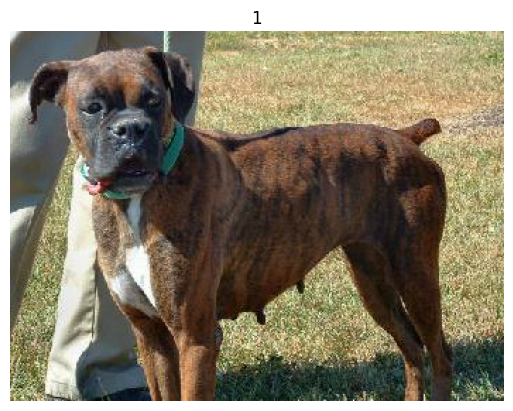

In [21]:
import tensorflow_datasets as tfds # for loading the dataset which contains the images
import matplotlib.pyplot as plt # for plotting the images
import numpy as np # for performing mathematical operations

def show(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title(label.numpy())
    plt.axis("off")
    plt.show()

cat_dog_dataset, info = tfds.load("cats_vs_dogs", with_info=True, as_supervised=True)

# iterate over the dataset and plot the images
for elem in cat_dog_dataset["train"].take(1):
    image, label = elem
    show(image, label)

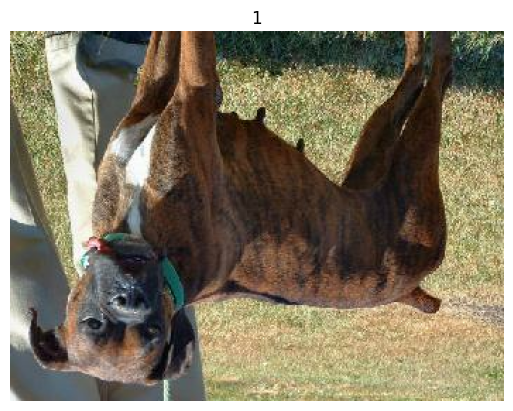

In [22]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

def show(image, label):
    plt.figure()
    flipped_image = np.flipud(image)
    plt.imshow(flipped_image)
    plt.title(label.numpy())
    plt.axis("off")
    plt.show()

cat_dog_dataset, info = tfds.load("cats_vs_dogs", with_info=True, as_supervised=True)

# iterate over the dataset and plot the images
for elem in cat_dog_dataset["train"].take(1):
    image, label = elem
    show(image, label)


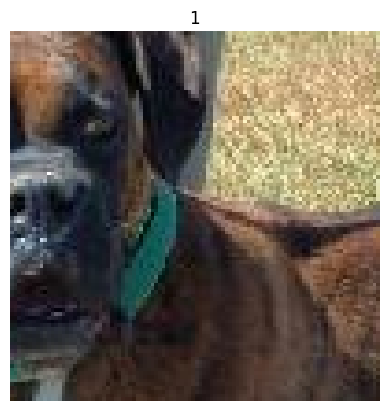

In [23]:
# randomly crop the image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

def show(image, label, crop_size=(100, 100)):
    plt.figure()
    cropped_image = tf.image.random_crop(image, size=(*crop_size, 3))
    plt.imshow(cropped_image)
    plt.title(label.numpy())
    plt.axis("off")
    plt.show()

cat_dog_dataset, info = tfds.load("cats_vs_dogs", with_info=True, as_supervised=True)

# iterate over the dataset and plot the images
for elem in cat_dog_dataset["train"].take(1):
    image, label = elem
    show(image, label)


In [24]:
# importance of initializing the weights of the neural network properly
initializer = tf.keras.initializers.he_normal()
layer = tf.keras.layers.Dense(100, activation="relu", kernel_initializer=initializer)

In [25]:
# create an SGD optimizer which simplifies the computation of the gradients
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2,
                 kernel_initializer='ones',
                 kernel_regularizer=tf.keras.regularizers.l2(0.001),
                 input_shape=(2,)
                 ),
    tf.keras.layers.Dense(1,
                 kernel_initializer='ones',
                 kernel_regularizer=tf.keras.regularizers.l1(0.01),
                 input_shape=(2,)
                 )
])

input_tensor = tf.ones(shape=(1,2)) * 5.0

model(input_tensor)

model.losses

[<tf.Tensor: shape=(), dtype=float32, numpy=0.004>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.02>]

In [27]:
input_tensor = tf.ones(shape=(10,))
layer = tf.keras.layers.Dropout(rate=.3, input_shape=(10,))
outputs = layer(input_tensor, training=True)
print(outputs)

tf.Tensor(
[1.4285715 1.4285715 0.        1.4285715 1.4285715 1.4285715 0.
 1.4285715 1.4285715 1.4285715], shape=(10,), dtype=float32)
